In [2]:
from cpclasses import *
from importlib import reload

import GraphNeuralNetworks
reload(GraphNeuralNetworks)
from GraphNeuralNetworks import *

In [3]:
x = torch.tensor([[0], [3], [6], [4], [3]], dtype=torch.float)
edge_index = np.array([[0, 3],
                       [0, 4],
                       [1, 2],
                       [1, 3],
                       [2, 1],
                       [3, 1],
                       [3, 4],
                       [3, 0],
                       [4, 0],
                       [4, 3]])
edge_index = torch.tensor(edge_index.T, dtype=torch.long)


pos = torch.tensor([[5, 0], [3, 3], [0, 4], [4, 1.5], [6, 3.5]], dtype=torch.float)

graph = Data(x=x, edge_index=edge_index, pos=pos)

print(graph.pos)

tensor([[5.0000, 0.0000],
        [3.0000, 3.0000],
        [0.0000, 4.0000],
        [4.0000, 1.5000],
        [6.0000, 3.5000]])


In [4]:
pos = torch.rand(graph.num_nodes, 2)

print(pos)

torch.mean(pos, axis=0)

tensor([[0.4545, 0.5201],
        [0.2011, 0.8939],
        [0.1798, 0.1691],
        [0.5163, 0.2878],
        [0.8818, 0.4884]])


tensor([0.4467, 0.4718])

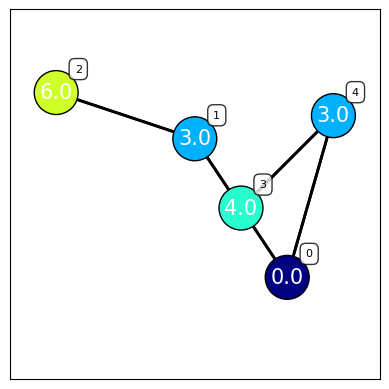

In [5]:
fig, ax = plt.subplots()

draw_graph(graph, ax, color_style='gradient')

save_plot(fig, 'Graph_with_attributes.png', dpi=500)

In [6]:
class CustomMessagePassing(MessagePassing):

    def forward(self, x, edge_index):
        return self.propagate(edge_index, x=x)



In [7]:
gnn1_layer = CustomMessagePassing(aggr='add')
graph.x = gnn1_layer(graph.x, graph.edge_index)
print(gnn1_layer(graph.x, graph.edge_index))


tensor([[10.],
        [ 9.],
        [10.],
        [21.],
        [13.]])


In [8]:
x = torch.tensor([[0], [3], [6], [4], [3]], dtype=torch.float)
edge_index = np.array([[0, 3],
                       [0, 4],
                       [1, 2],
                       [1, 3],
                       [2, 1],
                       [3, 1],
                       [3, 4],
                       [3, 0],
                       [4, 0],
                       [4, 3],
                       [0, 0],
                       [1, 1],
                       [2, 2],
                       [3, 3],
                       [4, 4]])
edge_index = torch.tensor(edge_index.T, dtype=torch.long)


pos = torch.tensor([[5, 0], [3, 3], [0, 4], [4, 1.5], [6, 3.5]], dtype=torch.float)

graph = Data(x=x, edge_index=edge_index, pos=pos)

print(graph.pos)

tensor([[5.0000, 0.0000],
        [3.0000, 3.0000],
        [0.0000, 4.0000],
        [4.0000, 1.5000],
        [6.0000, 3.5000]])


In [9]:
pos = torch.rand(graph.num_nodes, 2)

print(pos)

torch.mean(pos, axis=0)

tensor([[0.1248, 0.7449],
        [0.7448, 0.7409],
        [0.9735, 0.7304],
        [0.1949, 0.9623],
        [0.3554, 0.6560]])


tensor([0.4787, 0.7669])

In [10]:
gnn1_layer = CustomMessagePassing(aggr='add')
graph.x = gnn1_layer(graph.x, graph.edge_index)
print(graph.x)
print(gnn1_layer(graph.x, graph.edge_index))


tensor([[ 7.],
        [13.],
        [ 9.],
        [10.],
        [ 7.]])
tensor([[24.],
        [32.],
        [22.],
        [37.],
        [24.]])


In [11]:
x = torch.tensor([[0], [3], [6], [4], [3]], dtype=torch.float)
edge_index = np.array([[0, 3],
                       [0, 4],
                       [1, 2],
                       [1, 3],
                       [2, 1],
                       [3, 1],
                       [3, 4],
                       [3, 0],
                       [4, 0],
                       [4, 3],
                       [0, 0],
                       [1, 1],
                       [2, 2],
                       [3, 3],
                       [4, 4]])
edge_index = torch.tensor(edge_index.T, dtype=torch.long)


pos = torch.tensor([[5, 0], [3, 3], [0, 4], [4, 1.5], [6, 3.5]], dtype=torch.float)

graph = Data(x=x, edge_index=edge_index, pos=pos)

print(graph.pos)

tensor([[5.0000, 0.0000],
        [3.0000, 3.0000],
        [0.0000, 4.0000],
        [4.0000, 1.5000],
        [6.0000, 3.5000]])


In [12]:
class CustomMessagePassing(MessagePassing):

    def forward(self, x, edge_index):
        return self.propagate(edge_index, x=x)

gnn_max_layer = CustomMessagePassing(aggr='max')

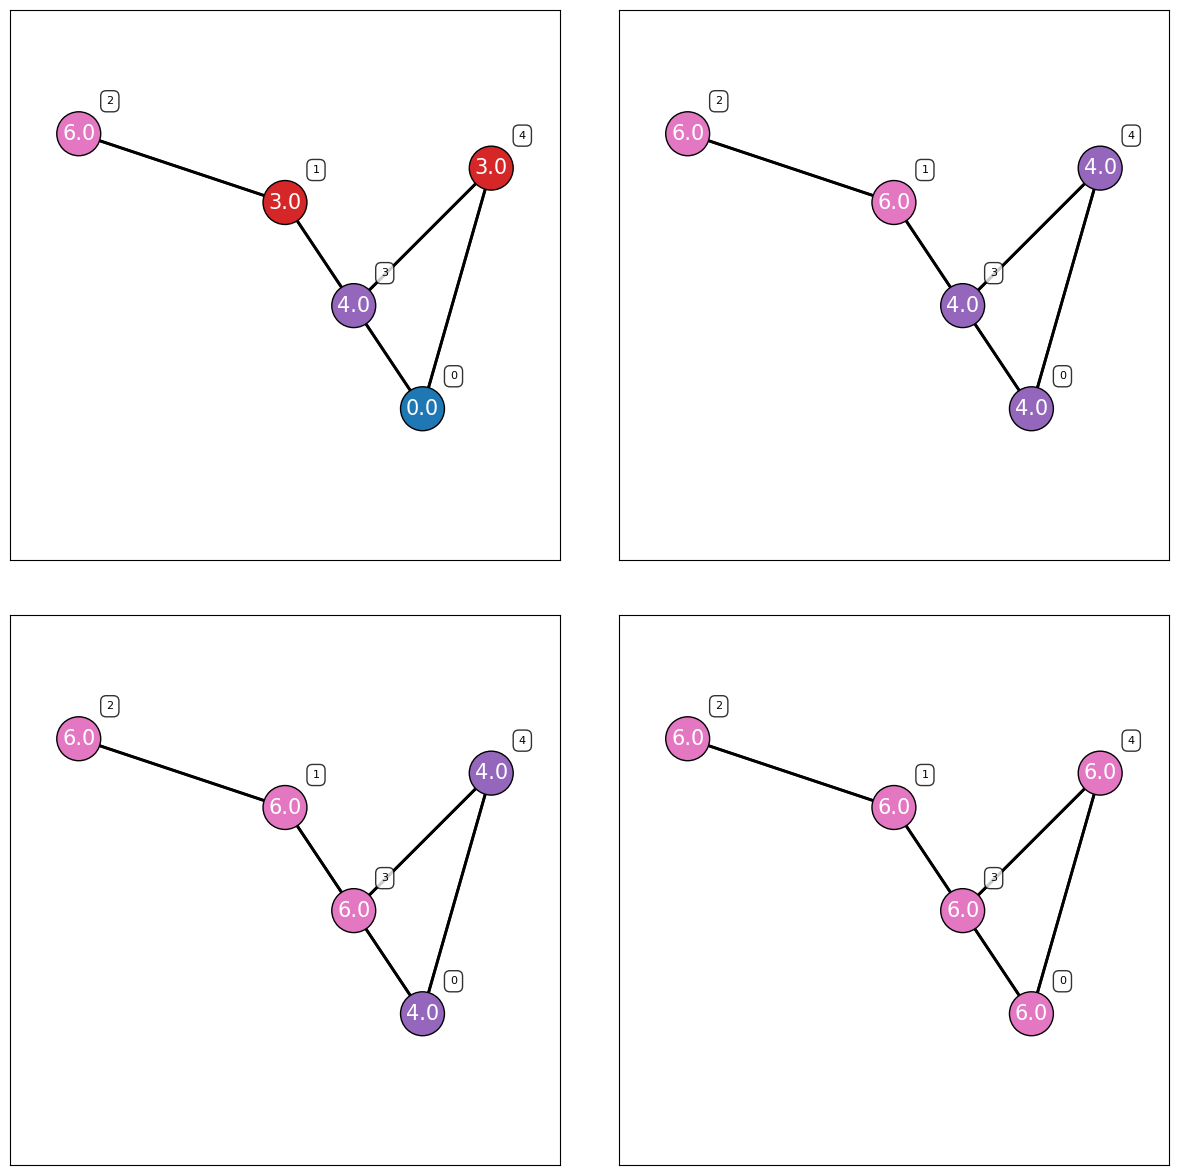

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

for ax in axs.flatten():
    draw_graph(graph, ax)
    graph.x = gnn_max_layer(graph.x, graph.edge_index)
    ax.set_aspect('equal')


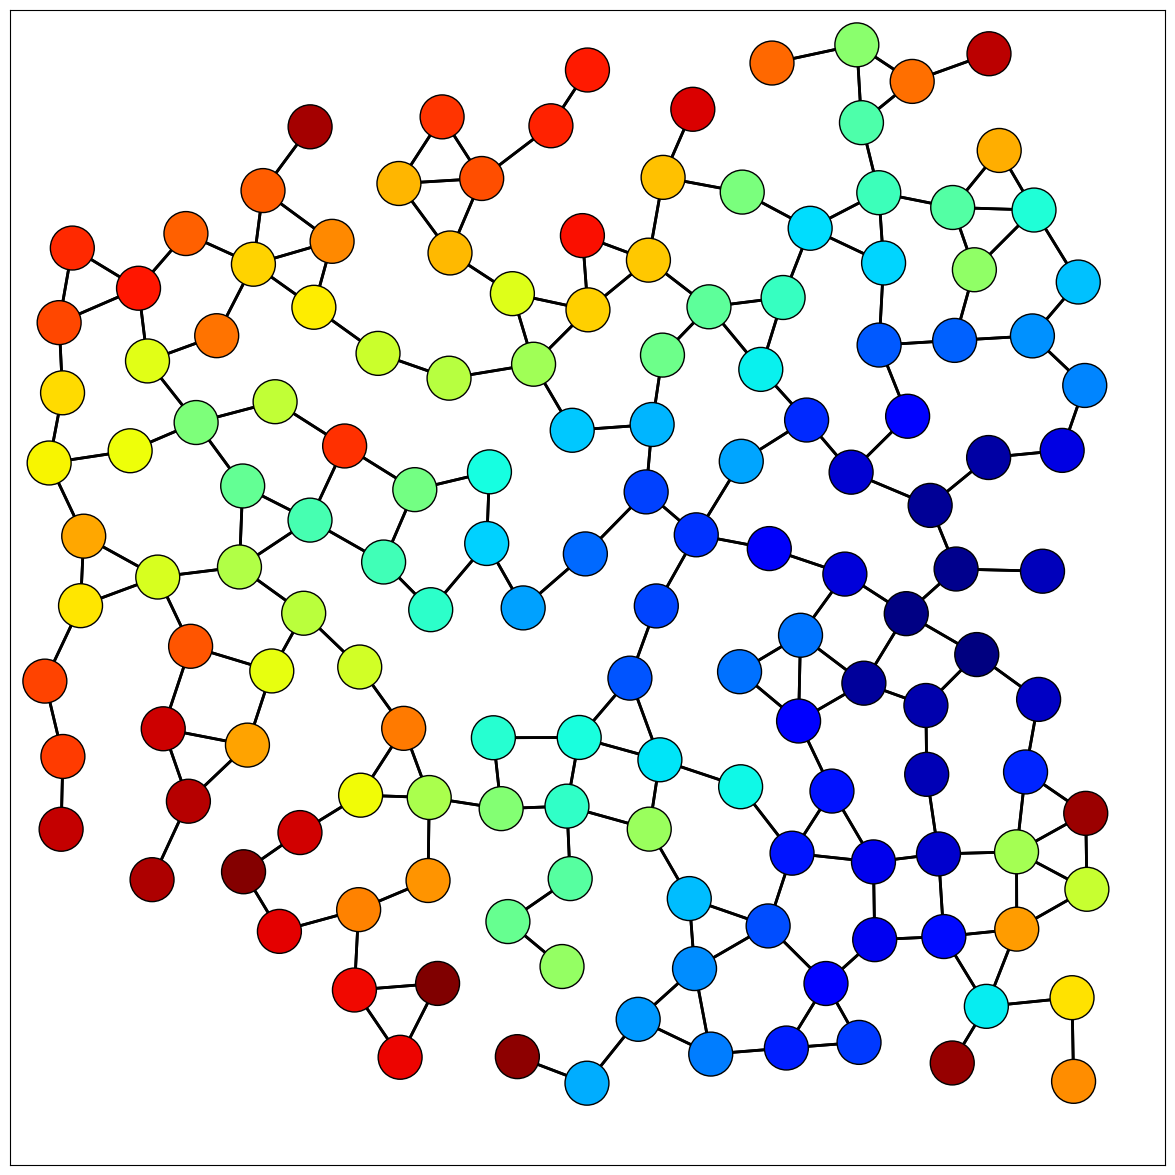

In [17]:
large_graph = random_graph(150, cutoff=2.5, box_size = 30)



gnn_max_layer = CustomMessagePassing(aggr='max')
feature_range = [np.min(large_graph.x.numpy()), np.max(large_graph.x.numpy())]

fig, ax= plt.subplots(figsize=(15, 15))

draw_graph(large_graph, ax, show_labels=False, color_style='gradient', feature_range=feature_range)
def update(i):
    ax.clear()
    draw_graph(large_graph, ax, show_labels=False, color_style='gradient', feature_range=feature_range)
    large_graph.x = gnn_max_layer(large_graph.x, large_graph.edge_index)
    ax.set_aspect('equal')






In [18]:
from matplotlib.animation import FuncAnimation
ani = FuncAnimation(fig, update, frames=range(15), repeat=False)
save_animation(ani, 'LargeGraphMaxPooling.gif', fps=2)